In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from scipy import stats

sns.set_theme()

# SVM

When the training examples are linearly seperable we can maximize the margin by minimizing the regularization term

$$
 \min_{\mathbf{w}} \frac{1}{2} ||\mathbf{w}||^2 = \frac{1}{2} \sum_{i=1}^d w^2_i
$$

subject to the classification constraint (gives us a constraint which requires that we correctly classify our labels and that there is a minimum margin between the closest points and the hyperplane).

$$
s.t. \quad y_i [\mathbf{x}_i^T \mathbf{w}] - 1 \geq 0, i=1,...,n
$$

The solution is defined only on the basis of a subset of examples or support vectors ($y_i [\mathbf{x}^T_i \mathbf{w}] - 1 = 0$). 
The support vectors are the datapoints $ \mathbf{x}_i $ which lie on the margin. 
The margin is thus defined by these support vectors.

When the training examples are not lineary seperable we add a penalty for violating the classification constraint

$$
\min_{\mathbf{w}} \frac{1}{2} ||\mathbf{w}||^2 + C\sum_{i=1}^n \xi_i
$$

subject to the relaxed constraint

$$
s.t. \quad y_i [\mathbf{x}^T_i \mathbf{w}] - 1 + \xi_i \geq 0, i=1,...,n
$$

The $\xi_i$ are called slack variables and it works as a shift variable which would shift the point back to the correct side of the margin.

We can rewrite the non-seperable case as

$$
C \sum_{i=1}^n (1 - y_i[\mathbf{x}_i^T \mathbf{w}])^+ + \frac{1}{2} ||\mathbf{w}||^2
$$

where $z^+ = t$ if $z \geq 0$ else $0$. 
This is equivalent to reguralized emperical loss minimization (ridge regression).

$$
\underbrace{\frac{1}{n} \sum_{i=1}^n (1 - y_i [\mathbf{x}_i^T \mathbf{w}])^+}_{R_{emp} \ (\text{Loss function})} + \lambda ||\mathbf{w}||^2, \quad \lambda = \frac{1}{2nC}
$$

The SVM is also very similair to the Logistic Regression (LOGREG).

$$
\begin{align*}
    \text{SVM} &: \frac{1}{n} \sum_{i=1}^n (1 - y_i [\mathbf{x}_i^T \mathbf{w}])^+ + \lambda ||\mathbf{w}||^2 \\
    \text{LOGREG} &: \frac{1}{n} \sum_{i=1}^n - \log \underbrace{\sigma(y_i [\mathbf{x}_i^T \mathbf{w}])}_{\mathbb{P}(y_i | \mathbf{x}_i, \mathbf{w})} + \lambda ||\mathbf{w}||^2
\end{align*}
$$

Where $\sigma(z) = (1 + e^{-z})^{-1}$ is the logistic function.

The way they differ is in the usage of the loss function. 
While the SVM uses the loss $(1 - z)^+$ (hinge loss), the LOGREG uses the loss $\log(1 + \exp(-z))$.

# Solution to SVM

We want to solve

$$
\min_{\mathbf{w}} \ \frac{1}{2} ||\mathbf{w}||^2 \quad s.t. \quad y_i[\mathbf{x}_i^T \mathbf{w}] - 1 \geq 0, i = 1, ..., n
$$

We rewrite our constraint with the help of the lagrangian multiplier into

$$
\sup_{\alpha_i \geq 0} \alpha_i (1 - y_i [\mathbf{x}_i^T \mathbf{w}]) = 
\begin{cases}
    0, \quad if \ y_i [\mathbf{x}_i^T \mathbf{w}] - 1 \geq 0 \\
    \infty, \quad otherwise
\end{cases}
$$

Thus with lagrangian our minimization problem as a lagrangian function we get

$$
\min_{\mathbf{w}} \frac{1}{2} ||\mathbf{w}||^2 + \sum_{i=1}^n \sup_{\alpha_i \geq 0} \alpha_i(1 - y_i[\mathbf{x}^T_i \mathbf{w}]) \\
\Rightarrow 
\min_{\mathbf{w}} \sup_{\alpha_i \geq 0} \left( \frac{1}{2} ||\mathbf{w}||^2 + \sum_{i=1}^n \alpha_i(1 - y_i[\mathbf{x}^T_i \mathbf{w}]) \right)
$$

We can swap the min and max problem by the use of slaters condition

$$
\max_{\alpha \geq 0} \left( \min_{\mathbf{w}} \left( \frac{1}{2} ||\mathbf{w}||^2 + \sum_{i=1}^n \alpha_i(1 - y_i[\mathbf{x}^T_i \mathbf{w}]) \right) \right)
$$

Because now the inner term (:= $ J(\mathbf{w})$) is a convex function we can take it's derivative and set it to zero, which then gives us

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i \overset{!}{=} 0 \\
\Rightarrow \mathbf{\hat{w}} =  \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i
$$

Plugging this back in to our initial problem gives us 

$$
\max_{\alpha_i \geq 0} \left( \frac{1}{2} ||\hat{\mathbf{w}}||^2 + \sum_{i=1}^n \alpha_i(1 - y_i[\mathbf{x}^T_i \hat{\mathbf{w}}]) \right) \\
\max_{\alpha_i \geq 0} \left( \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n y_i y_j \alpha_i \alpha_j \mathbf{x}_i^T \mathbf{x}_j^T \right) \\
$$

Here the function in terms of $\alpha$ is a concave function therefor we can again easily calculate the optimal parameters by taking the derivative and setting it to zero. 
This maximization is the so called dual. 
Only $\hat{\alpha}_i$'s corresponding to the support vectors will be non-zero.

If we now would like to make new predictions we do

$$
sign(\mathbf{x}^T \hat{\mathbf{w}}) = sign(\mathbf{x}^T \sum_{i=1}^n \hat{\alpha}_i y_i \mathbf{x}_i) = sign(\sum_{i \in SV} \hat{\alpha}_i y_i \mathbf{x}_i^T \mathbf{x}_i)
$$

The value of the function then on the input vectors only via the dot-product of the new datapoint vector and all the support vectors.

# Lagrange functions

In a convex optimization problem we want to minimize a convec function subject to some convex function constraints

$$
\min f(\mathbf{x}) \quad s.t. \quad g_i(\mathbf{x}) \leq 0, \ i=1,...,m 
$$

With the help of lagrange multipliers we can rewrite this problem into the lagrangian function

$$
\mathcal{L}(\mathbf{x}, \lambda_0, ..., \lambda_m) = \lambda_0 f(\mathbf{x}) + \lambda_1 g_1(\mathbf{x}) + ... + \lambda_m g_m (\mathbf{x})
$$

* **Karush-Kuhn-Tucker (KKT) conditions**

*For each point $\hat{\mathbf{x}}$ that minimizes $f$, there exist real numbers $\lambda_0, ..., \lambda_m$, called the Lagrange multipliers, that simultaneosly satisfy*

1. $\hat{\mathbf{x}}$ minimizes $\mathcal{L}(\mathbf{x}, \lambda_0, ..., \lambda_m)$
2. $\lambda_0 \geq 0, ..., \lambda_m \geq 0$ with atleast one $\lambda_k > 0$
3. Complementary slackness $g_i(\mathbf{\hat{x}}) < 0 \Rightarrow \lambda_i = 0$

* *Slater's Condition*

*If there exist a strictly feasible point $z$ satisfying $g_1(z) < 0, ..., g_m(z) < 0$, then one can set $\lambda_0 = 1$.* 

Assume that the Slater's condition holds. Minimizing the supremum $ \mathcal{L}^*(\mathbf{x}) = \sup_{\lambda \geq 0} \mathcal{L}(\mathbf{x}, \mathbf{\lambda})$, is the primal problem

$$
\hat{\mathbf{x}} = \arg \min_{\mathbf{x}} \mathcal{L}^* (\mathbf{x})
$$

Because

$$
\mathcal{L}^* (\mathbf{x}=  \sup_{\lambda \geq 0} \left( f(\mathbf{x}) + \sum_{i=1}^m \lambda_i g_i(\mathbf{x}) \right) = 

\begin{cases}
    f(\mathbf{x}), \quad if \ g_i(\mathbf{x}) \leq 0 \ \forall i \\
    \infty, \quad  else \\
\end{cases}
$$

Minimizing $ \mathcal{L}^*(\mathbf{x}) $ is equivalent to minimizing $f(\mathbf{x})$.

The maximizer of the dual problem is 

$$
\hat{\mathbf{\lambda}} \arg \max_{\mathbf{\lambda}} \mathcal{L}_* (\mathbf{\lambda}), \quad where \quad \mathcal{L}_*(\mathbf{\lambda}) = \inf_{\mathbf{x}} \mathcal{L}(\mathbf{x}, \mathbf{\lambda})
$$

The non negative numbner min P - min D is then the so called duality gap. Convexity and Slater's condition imply strong duality.

1. The optimal solution $(\mathbf{\hat{x}}, \mathbf{\hat{\lambda}})$ is a saddle point of $ \mathcal{L}(\mathbf{x}, \mathbf{\lambda}) $
2. The duality gap is zero



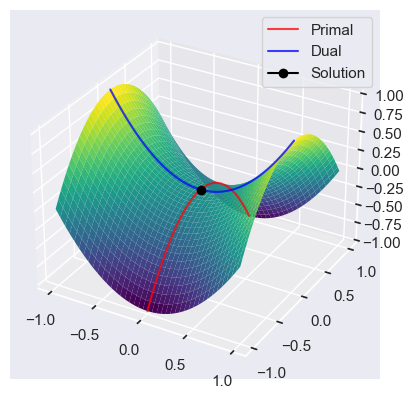

In [43]:
fig = plt.figure(figsize=plt.figaspect(0.5))

x = np.arange(-1, 1, 0.01)

X, Y = np.meshgrid(x, x)
Z = X**2 - Y**2

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot(x * 0, x, -x**2, color='red', alpha=0.75, label='Primal')
ax.plot(x, x*0, x**2, color='blue', alpha=0.75, label='Dual')
ax.plot(0, 0, 0, marker='o', color='black', label='Solution') 

ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, rstride=5, cstride=5)
plt.legend()
plt.show()

# Kernel function

A kernel function is a real-valued function of two arguments, $k(\mathbf{x}, \mathbf{x}') \in \mathbb{R}$ for $ \mathbf{x}, \mathbf{x}' \in \mathcal{X} $, where $ \mathcal{X}$ is the input space. 
Often the function symmetric and sometimes non-negative.
An example of a kernel function is the radial basis function (RBF) kernel

$$
k(\mathbf{x}, \mathbf{x}') = \exp \left( - \frac{||\mathbf{x}- \mathbf{x}'||^2}{2\sigma^2} \right)
$$

The RBF in a sense works as a similarity measure between the two arguments.


## Mercer kernel

A symmetric kernel is a so called Mercer kernel, if and only if the Gram matrix

$$
\begin{pmatrix} 
    k(\mathbf{x}_1, \mathbf{x}_1) & \ldots & k(\mathbf{x}_1, \mathbf{x}_n) \\
     & \vdots &  \\
    k(\mathbf{x}_n, \mathbf{x}_1) & \ldots & k(\mathbf{x}_n, \mathbf{x}_n) \\
\end{pmatrix}
$$

is positive semidefinite for any set of inputs $\{\mathbf{x}_i, ..., \mathbf{x}_n\}$.

By the eigenvector decomposition

$$
K = V \Lambda V^T = (V \Lambda^{1/2})(V \Lambda^{1/2})^T = \Phi \Phi^T
$$

If we now deine $\phi(\mathbf{x}_i)^T = $ i'th row of $\Phi$ then we get our kernel function $k(\mathbf{x}_i, \mathbf{x}_{i'}) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_{i'})$.

If the kernel is Mercer, then there exists $\phi : \mathbf{x} \rightarrow \mathbb{R}^d$ such that $k(\mathbf{x}, \mathbf{x}') = \phi(\mathbf{x})^T \phi(\mathbf{x})$, where $\phi$ depends on the eigenfunctions of $k$ (d might be infinite).

## Kernel Trick

The kernel in essence is the dot product of the mapping of the two input variables into a higher space. 
By using the kernel as a calculation method, we remove the need to explicitly map the feature vector into a higher dimension and then calculate the dot product of the two vectors. 
We can directly calculate the higher dimension dot product using the kernel.

Thus in our different algorithms we can just replace the dot product by a arbitrary kernel function $k(\mathbf{x}, \mathbf{x}')$.
For ridge regression for example we get

$$
\hat{\mathbf{x}} = (X^T X + \lambda I)^{-1} X^T \mathbf{y} = X^T (X X^T + \lambda I)^{-1} \mathbf{y} = \sum_{i=1}^n \hat{\alpha}_i \mathbf{x}_i
$$

Where we use the matrix inversion lemma

$$
(I + U V)^{-1} U = U(I + VU)^{-1}
$$

Making new predictions using our optimal $ \hat{\mathbf{w}} $ is then given by 

$$
\hat{f}(\mathbf{x}) = \hat{\mathbf{w}}^T \mathbf{x}  = \sum_{i=1}^n \hat{\alpha}_i \mathbf{x}_i^T \mathbf{x} =  \sum_{i=1}^n \hat{\alpha}_i k(\mathbf{x}_i, \mathbf{x})
$$

Same holds for our SVM

$$
\hat{\mathbf{w}}^T \mathbf{x} = \sum_{i \in SV} \hat{\alpha}_i y_i \mathbf{x}_i^T \mathbf{x} = \sum_{i \in SV} \hat{\alpha}_i y_i k(\mathbf{x}_i, \mathbf{x})
$$

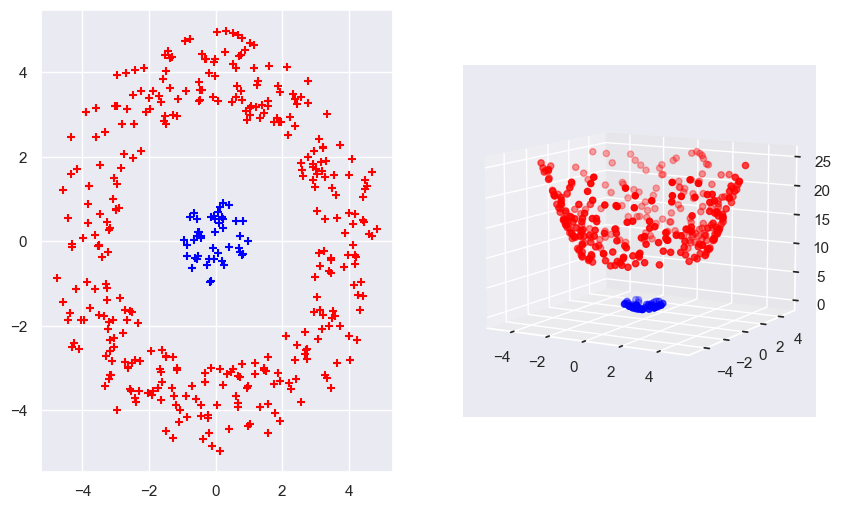

In [76]:
np.random.seed(0)

normal_1 = stats.multivariate_normal([0, 0], [[2, 0], [0, 2]])
normal_2 = stats.multivariate_normal([0, 0], [[10, 0], [0, 10]])
rvs_normal_1 = normal_1.rvs(size=200).T
rvs_normal_2 = normal_2.rvs(size=1000).T

distances = np.sqrt(rvs_normal_1[0, :]**2 + rvs_normal_1[1, :]**2)
filtered_indices = distances <= 1
rvs_normal_1 = rvs_normal_1[:, filtered_indices]

distances = np.sqrt(rvs_normal_2[0, :]**2 + rvs_normal_2[1, :]**2)
filtered_indices = distances >= 3
rvs_normal_2 = rvs_normal_2[:, filtered_indices]

distances = np.sqrt(rvs_normal_2[0, :]**2 + rvs_normal_2[1, :]**2)
filtered_indices = distances < 5
rvs_normal_2 = rvs_normal_2[:, filtered_indices]

fig = plt.figure(figsize=(10, 6))

axs1 = fig.add_subplot(1, 2, 1)

axs1.scatter(rvs_normal_1[0, :], rvs_normal_1[1, :], marker='+', zorder=5, label='Class 1', color='blue')
axs1.scatter(rvs_normal_2[0, :], rvs_normal_2[1, :], marker='+', zorder=5, label='Class 2', color='red')

axs2 = fig.add_subplot(1, 2, 2, projection='3d')

basis_expansion_Z = lambda X : X[0, :]**2 + X[1, :]**2

axs2.scatter(rvs_normal_1[0, :], rvs_normal_1[1, :], basis_expansion_Z(rvs_normal_1), color='blue')
axs2.scatter(rvs_normal_2[0, :], rvs_normal_2[1, :], basis_expansion_Z(rvs_normal_2), color='red')
axs2.view_init(elev=10)